<a href="https://colab.research.google.com/github/JatinK169/MRM_TaskPhase/blob/main/Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Country-data.csv')
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
dat['exports'] = dat['exports']*dat['gdpp']/100
dat['imports'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
dat.shape

(167, 10)

In [10]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
dat.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

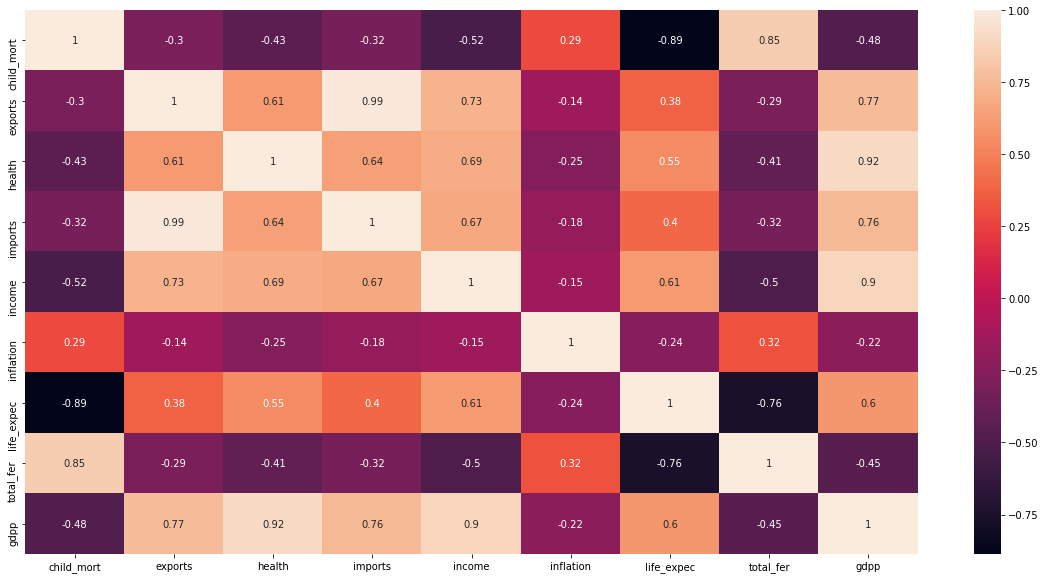

In [12]:
#first  plot the correlation matrix and check if the data is indeed highly correlated
#so that the usage of PCA in this scenario is justified
plt.figure(figsize = (20,10))        
sns.heatmap(dat.corr(),annot = True)

In [13]:
#The final matrix would only contain the data columns. Hence  drop the country column
datm=dat.drop(['country'],axis=1)
datm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
X = datm.iloc[:,0:-1].values
y = datm.iloc[:,8].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)
x_train.shape

(133, 8)

In [16]:
X

array([[9.02000e+01, 5.53000e+01, 4.19174e+01, ..., 9.44000e+00,
        5.62000e+01, 5.82000e+00],
       [1.66000e+01, 1.14520e+03, 2.67895e+02, ..., 4.49000e+00,
        7.63000e+01, 1.65000e+00],
       [2.73000e+01, 1.71264e+03, 1.85982e+02, ..., 1.61000e+01,
        7.65000e+01, 2.89000e+00],
       ...,
       [2.33000e+01, 9.43200e+02, 8.96040e+01, ..., 1.21000e+01,
        7.31000e+01, 1.95000e+00],
       [5.63000e+01, 3.93000e+02, 6.78580e+01, ..., 2.36000e+01,
        6.75000e+01, 4.67000e+00],
       [8.31000e+01, 5.40200e+02, 8.59940e+01, ..., 1.40000e+01,
        5.20000e+01, 5.40000e+00]])

In [17]:
y

array([   553,   4090,   4460,   3530,  12200,  10300,   3220,  51900,
        46900,   5840,  28000,  20700,    758,  16000,   6030,  44400,
         4340,    758,   2180,   1980,   4610,   6350,  11200,  35300,
         6840,    575,    231,    786,   1310,  47400,   3310,    446,
          897,  12900,   4560,   6250,    769,    334,   2740,   8200,
         1220,  13500,  30800,  19800,  58000,   5450,   4660,   2600,
         2990,  17100,    482,  14600,   3650,  46200,  40600,   8750,
          562,   2960,  41800,   1310,  26900,   7370,   2830,    648,
          547,   3040,    662,  13100,  41900,   1350,   3110,   6530,
         4500,  48700,  30600,  35800,   4680,  44500,   3680,   9070,
          967,   1490,  38500,    880,   1140,  11300,   8860,   1170,
          327,  12100,  12000, 105000,   4540,    413,    459,   9070,
         7100,    708,  21100,   1200,   8000,   2860,   1630,   2650,
         6680,   2830,    419,    988,   5190,    592,  50300,  33700,
      

In [18]:
# do rescaling so that PCA can be applied.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(x_train)
dat2

array([[-0.84603846, -0.06539477,  0.65691432, ..., -0.64850129,
         1.01452782, -1.03541561],
       [ 1.28542148, -0.40261812, -0.57716042, ..., -0.20433092,
        -1.08498229,  1.39831517],
       [ 1.75214632, -0.39106391, -0.56266554, ..., -0.53191462,
        -1.47173415,  1.4586556 ],
       ...,
       [-0.50909807, -0.3835059 , -0.50554002, ..., -0.36904295,
        -0.07942745,  0.6541165 ],
       [-0.79362551,  0.13639656, -0.11033599, ..., -0.4932671 ,
         0.428875  , -1.1292785 ],
       [ 1.9518147 , -0.40019241, -0.57707482, ..., -0.08102694,
        -1.40543383,  1.96819703]])

In [19]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(6)

In [20]:
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
dat2.shape

(133, 8)

In [22]:
x_projected = pca.transform(dat2)

In [23]:
pca.components_

array([[-0.36681233,  0.36109291,  0.37165252,  0.36398899,  0.40149562,
        -0.16499495,  0.39051777, -0.35145534],
       [ 0.43823065,  0.47899587,  0.161761  ,  0.45877554,  0.16454838,
         0.18055603, -0.3338221 ,  0.41323285],
       [-0.14652699, -0.0059824 , -0.07884561, -0.04336875,  0.12769669,
         0.95548633,  0.1885806 , -0.07465501],
       [ 0.1619682 , -0.34669297,  0.78276425, -0.34386409,  0.21927428,
         0.04766652,  0.07521334,  0.25806503],
       [ 0.1457459 , -0.05730821, -0.38028811, -0.2760164 ,  0.84832135,
        -0.10964305, -0.14608139, -0.0407348 ],
       [ 0.25361463, -0.04326826,  0.23789861, -0.00300141, -0.0543624 ,
         0.11026636, -0.52938674, -0.76278336]])

Scree plot

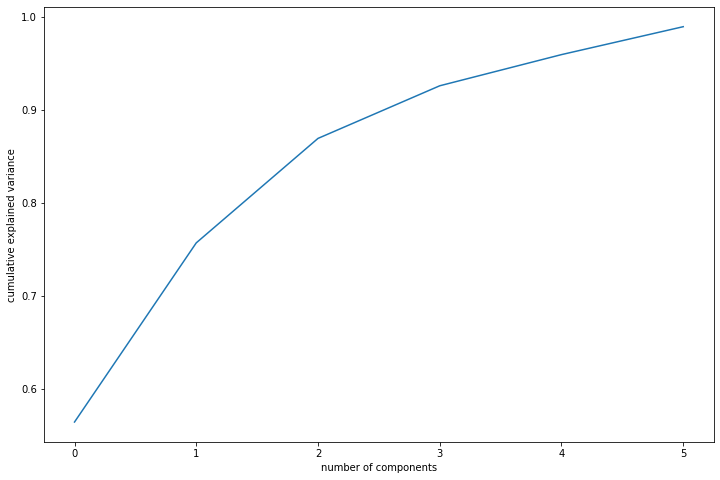

In [24]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linearR = LinearRegression()
linearR.fit(x_projected,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
linearR.coef_

array([8320.3044467 , 4518.90148067,   19.48353353, 9746.95814965,
       3394.73191455, 1339.10001918])

In [27]:
linearR.intercept_

14013.315789473685

Score = 98%

In [28]:
linearR.score(x_projected,y_train)

0.9800351361713036

In [29]:
pca.explained_variance_ratio_

array([0.56446994, 0.19248711, 0.1122238 , 0.05653322, 0.03348804,
       0.02999693])

Manual implemention of PCA

In [ ]:
class PCA:
  def init(self,Ncomponent):
    self.Ncomponent = Ncomponent
    self.components=None
    self.mean= None

  def fit (self,X):
    self.mean = np.mean(X,axis = 0)
    X =X - self.mean

    cov = np.cov(X.T)
    eigenvalues,eigenvector=np.linalg.eig(cov)
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvector = eigenvector[idxs]
    self.components = eigenvectors[0:self.Ncomponent]
    print("Reduced information",self.components)

  def transform(self,X):
    X= X - self.mean
    return np.dot(X, self.components.T)

In [44]:
dat_train = standard_scaler.fit_transform(x_train)

In [45]:
pca = PCA(6)
pca.fit(dat_test)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
x_pro = pca.transform(dat_train)
x_pro.shape

(133, 6)

In [48]:
linearR.fit(x_pro,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score 97.95%

In [51]:
linearR.score(x_pro,y_train)

0.9795494361958195